In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets, metrics

# Keras
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19, VGG16
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img
from keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Import Data 

In [0]:
# Meghna's path 
#basepath = '/content/drive/My Drive/University of Chicago/ML Final Project/'

# Li's path
#basepath= '/content/drive/My Drive/ML Final Project/'

# Vamika's path
basepath= '/content/drive/My Drive/ML Final Project/'

# Viviana path
# basepath= '/content/drive/My Drive/ML Final Project/'

In [4]:
# Import data
train = pd.read_csv(basepath + 'fashion-mnist_train.csv')
test = pd.read_csv(basepath + 'fashion-mnist_test.csv')

print(train.shape, test.shape)

(60000, 785) (10000, 785)


In [0]:
# View data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
# Check class distribution for the labels
train['label'].value_counts(normalize = True)

9    0.1
8    0.1
7    0.1
6    0.1
5    0.1
4    0.1
3    0.1
2    0.1
1    0.1
0    0.1
Name: label, dtype: float64

In [9]:
# Separate X and y variables for Train & Test
X = train.drop('label', axis=1)
y = train.loc[:, 'label']

X_test = test.drop('label', axis=1)
y_test = test.loc[:, 'label']

print('Train Data:', X.shape, y.shape)
print('Test Data:', X_test.shape, y_test.shape)

Train Data: (60000, 784) (60000,)
Test Data: (10000, 784) (10000,)


In [0]:
# Standardize from [0,255] to [0,1]
X /= 255
X_test /= 255

In [0]:
# Add desc to label
label_dict = {0: "T-shirt/top", 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

def true_label(x):
    return label_dict[x]

target_names = list(label_dict.values())

# Visualize Data

## Image Block

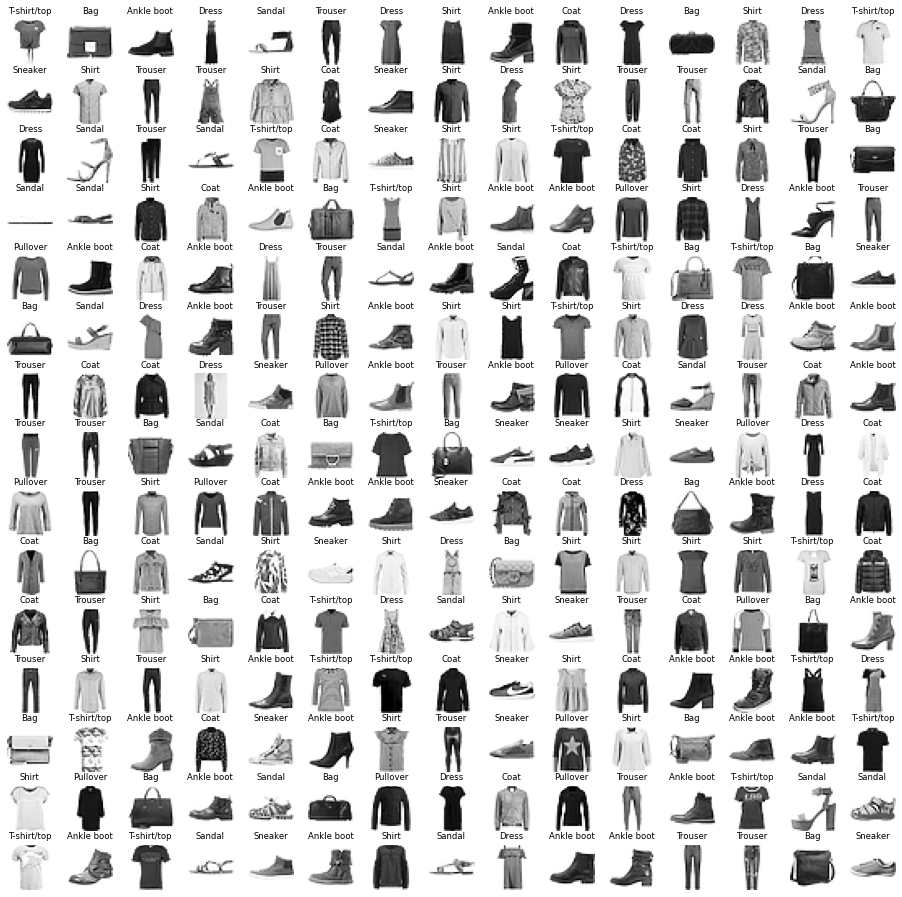

In [0]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    img = X.loc[index].values.reshape(28,28)
    axes[i].imshow(img, cmap = 'Greys')
    axes[i].set_title(true_label(y.loc[index]), fontsize = 8.5, color = 'black')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

## Images per Class

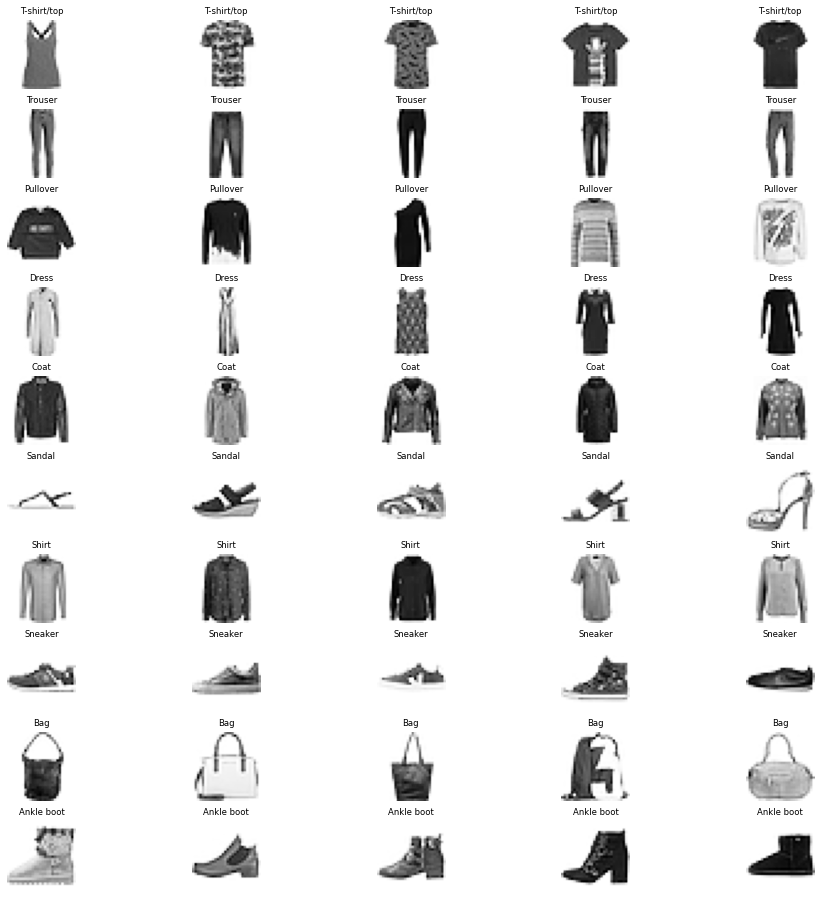

In [0]:
# show 5 examples for a selected class
subset = train.groupby('label').head(5).sort_values('label')
subset_x = subset.drop('label', axis=1)
subset_y = subset.loc[:, 'label']

W_grid = 5
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = i
    # read and display an image with the selected index
    img = subset_x.iloc[index].values.reshape(28,28)
    axes[i].imshow(img, cmap = 'Greys')
    axes[i].set_title(true_label(subset_y.iloc[index]), fontsize = 8.5, color = 'black')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# Dimension Reduction - PCA

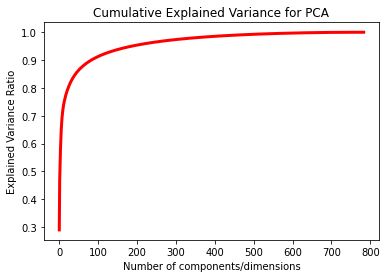

In [0]:
from sklearn.decomposition import PCA

x_train_pca = PCA().fit(X)
ax = plt.plot(np.cumsum(x_train_pca.explained_variance_ratio_), color='red', linewidth=3)
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of components/dimensions')
plt.ylabel('Explained Variance Ratio')
plt.show()

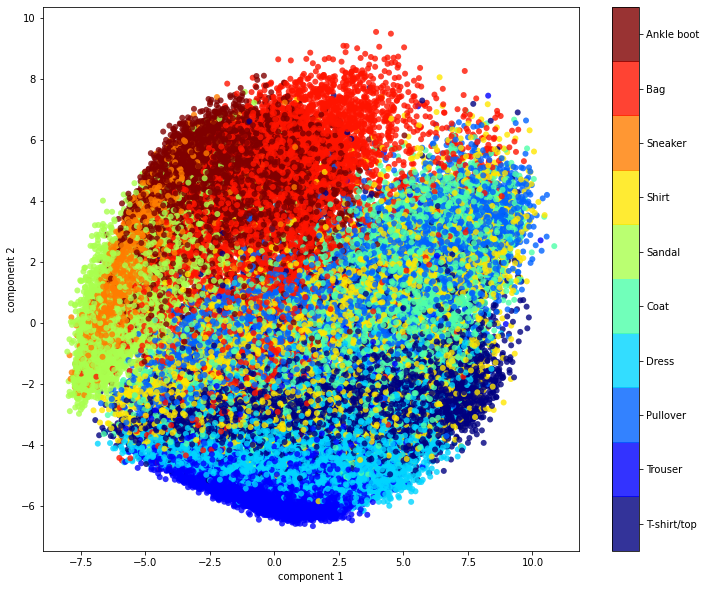

In [0]:
pca = PCA(2)  # project to 2 dimensions
projected = pca.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(target_names)
plt.savefig(basepath + 'mnist_pca')

# Cluster Analysis - TSNE

In [0]:
tsne = TSNE(random_state=0, learning_rate=10, n_jobs = -1, verbose=0)
X_2d = tsne.fit_transform(X)

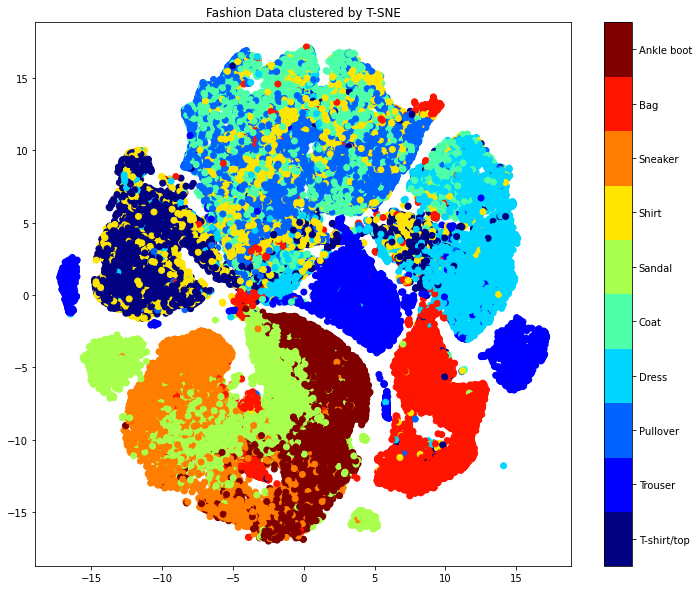

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(12, 10))
xs = X_2d[:,0]
ys = X_2d[:,1]
plt.scatter(xs, ys, c=y, cmap=plt.cm.get_cmap("jet", 10))
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(target_names)
plt.title("Fashion Data clustered by T-SNE") 
plt.show()
plt.savefig(basepath + 'mnist_tsne.jpg')

# Cluster Analysis -Umap


In [0]:
# Umap data 
import umap 
data = X.values.astype(np.float32)
target = y
reduce = umap.UMAP(random_state = 223) #just for reproducibility
embedding = reduce.fit_transform(data)

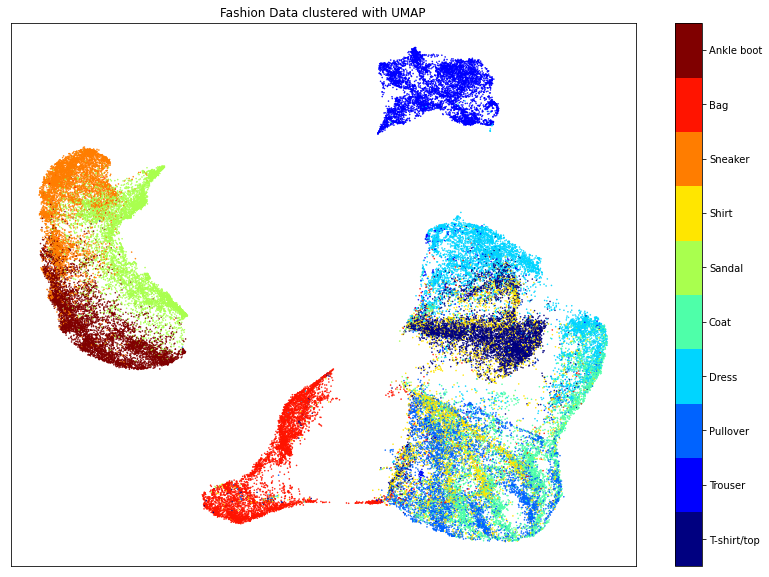

In [0]:
# umap visualization 
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap=plt.cm.get_cmap("jet", 10), alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(target_names)
plt.title('Fashion Data clustered with UMAP')
plt.savefig(basepath + 'mnist_umap')

# Train - Validation Split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)
print('Train Data:', X_train.shape, y_train.shape)
print('Val Data:', X_val.shape, y_val.shape)
print('Test Data:', X_test.shape, y_test.shape)

Train Data: (48000, 784) (48000,)
Val Data: (12000, 784) (12000,)
Test Data: (10000, 784) (10000,)


# Model 1 - SVM RBF

In [68]:
sv = svm.SVC(C = 5, gamma = 0.001)
sv.fit(X,y)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'SVM RBF (Test): Confusion Matrix')

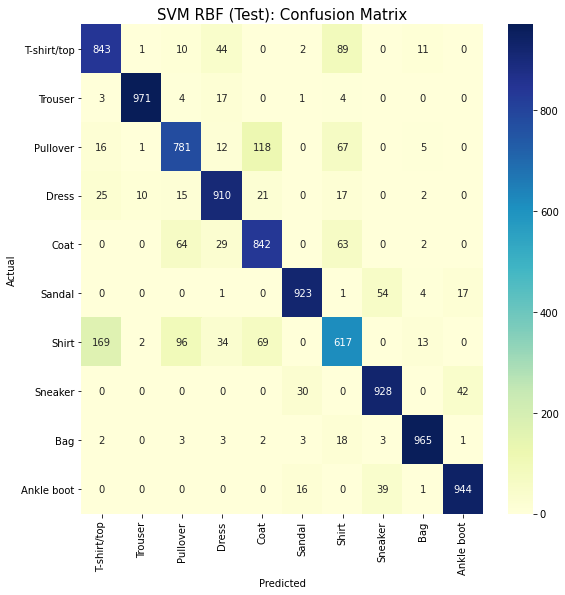

In [69]:
sv_pred = sv.predict(X_test)

# plot confusion matrix
svm_cm = confusion_matrix(y_test, sv_pred)

plt.figure(figsize=(9,9))
sns.heatmap(svm_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('SVM RBF (Test): Confusion Matrix', size = 15)

In [70]:
# classification report - test
cr_svm = classification_report(y_test, sv_pred, target_names = target_names)
print('SVM RBF (Test) \n', cr_svm)

SVM RBF (Test) 
               precision    recall  f1-score   support

 T-shirt/top       0.80      0.84      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.78      0.79      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.80      0.84      0.82      1000
      Sandal       0.95      0.92      0.93      1000
       Shirt       0.70      0.62      0.66      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Model 2 - XGBoost Classifier

In [0]:
# xbgoost
import xgboost as xgb

D_train = xgb.DMatrix(X, label=y)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.1, 
    'max_depth': 5,  
    'objective': 'multi:softprob',  
    'num_class': 10} 

steps = 20

model_xgb = xgb.train(param, D_train, steps)

Text(0.5, 1.0, 'XGB (Test): Confusion Matrix')

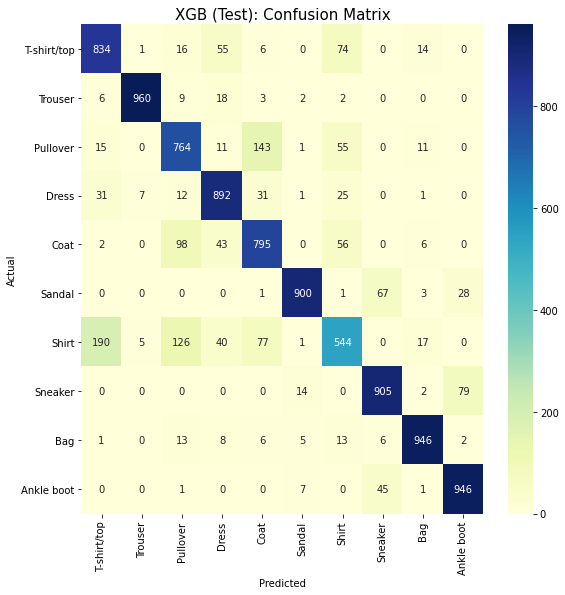

In [72]:
preds_xgb = model_xgb.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds_xgb])

# plot confusion matrix
xgb_cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(9,9))
sns.heatmap(xgb_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('XGB (Test): Confusion Matrix', size = 15)

In [73]:
# classification report - test
cr_xgb = classification_report(y_test, best_preds, target_names = target_names)
print('XGB (Test) \n', cr_xgb)

XGB (Test) 
               precision    recall  f1-score   support

 T-shirt/top       0.77      0.83      0.80      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.74      0.76      0.75      1000
       Dress       0.84      0.89      0.86      1000
        Coat       0.75      0.80      0.77      1000
      Sandal       0.97      0.90      0.93      1000
       Shirt       0.71      0.54      0.61      1000
     Sneaker       0.88      0.91      0.89      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.90      0.95      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [74]:
# classification report - train
preds_xgb_t = model_xgb.predict(D_train)
best_preds_t = np.asarray([np.argmax(line) for line in preds_xgb_t])

cr_xgb_t = classification_report(y, best_preds_t, target_names = target_names)
print('XGB (Train) \n', cr_xgb_t)

XGB (Train) 
               precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      6000
     Trouser       1.00      0.96      0.98      6000
    Pullover       0.76      0.80      0.78      6000
       Dress       0.84      0.91      0.87      6000
        Coat       0.74      0.79      0.77      6000
      Sandal       0.98      0.92      0.95      6000
       Shirt       0.75      0.56      0.64      6000
     Sneaker       0.91      0.94      0.93      6000
         Bag       0.96      0.96      0.96      6000
  Ankle boot       0.93      0.96      0.94      6000

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000



# Model 3 - Gradient Boosting Classifier

In [0]:
gbc = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.5)
gbc.fit(X, y.values.ravel())

In [0]:
# unable to pull in model from RCC due to difference in sklearn versions -- will pull in predictions instead. for more detail on the GBC, please visit our github.

# from google.colab import files
# data_to_load = files.upload()

Saving gbc_mnist_jl.joblib to gbc_mnist_jl.joblib


In [89]:
# pull in predictions
gbc_pred = pd.read_csv(basepath + 'gbc_preds.csv')
gbc_pred_t = pd.read_csv(basepath + 'gbc_t_preds.csv')

gbc_pred = gbc_pred['predictions']
gbc_pred_t = gbc_pred_t['predictions']

print(gbc_pred_t.shape, gbc_pred.shape)


(60000,) (10000,)


Text(0.5, 1.0, 'GBC (Test): Confusion Matrix')

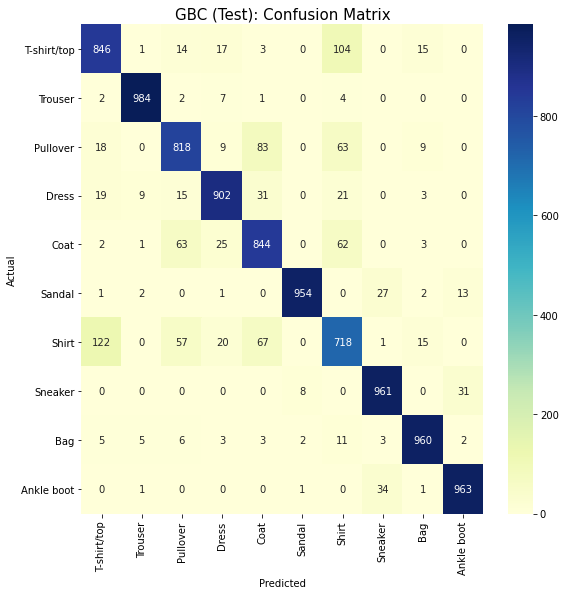

In [90]:
# plot confusion matrix
gbc_cm = confusion_matrix(y_test, gbc_pred)

plt.figure(figsize=(9,9))
sns.heatmap(gbc_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('GBC (Test): Confusion Matrix', size = 15)

In [91]:
# classification report - test
cr_gbc = classification_report(y_test, gbc_pred, target_names = target_names)
print('GBC (Test) \n', cr_gbc)

GBC (Test) 
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.84      0.82      0.83      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.82      0.84      0.83      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.73      0.72      0.72      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [92]:
# classification report - train
cr_gbc_t = classification_report(y, gbc_pred_t, target_names = target_names)
print('GBC (Train) \n', cr_gbc_t)

GBC (Train) 
               precision    recall  f1-score   support

 T-shirt/top       1.00      1.00      1.00      6000
     Trouser       1.00      1.00      1.00      6000
    Pullover       1.00      1.00      1.00      6000
       Dress       1.00      1.00      1.00      6000
        Coat       1.00      1.00      1.00      6000
      Sandal       1.00      1.00      1.00      6000
       Shirt       0.99      1.00      1.00      6000
     Sneaker       1.00      1.00      1.00      6000
         Bag       1.00      1.00      1.00      6000
  Ankle boot       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



# Model 4 - Logistic Regression

In [0]:
# Separate X and y variables for Train & Test
X_lr_train = X
y_lr_train = y

# test variables reminders X_test, y_test

In [0]:
# Create an sklearn.linear_model.LogisticRegression classifier
LR_model = LogisticRegression(multi_class="ovr", penalty='l2',
                         solver="lbfgs", C=10)

# train the classifier using the labels and the feature-scaled pixel values 
LR_model.fit(X_lr_train, y_lr_train)

In [36]:
# predict dataset pixel_scaled using trained model
y_pred_lr = LR_model.predict(X_test)

y_proba_lr = LR_model.predict_proba(X_test)
print(y_pred_lr.shape, y_proba_lr.shape)

(10000,) (10000, 10)


Text(0.5, 1.0, 'Log Reg (Test): Confusion Matrix')

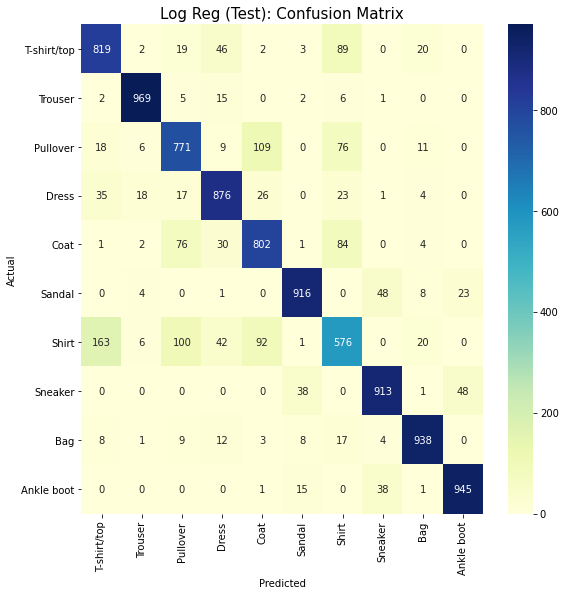

In [28]:
# plot confusion matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(9,9))
sns.heatmap(lr_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('Log Reg (Test): Confusion Matrix', size = 15)

In [29]:
# classification report - test
cr_lr = classification_report(y_test, y_pred_lr, target_names = target_names)
print('Log Reg (Test) \n', cr_lr)

Log Reg (Test) 
               precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.77      0.77      0.77      1000
       Dress       0.85      0.88      0.86      1000
        Coat       0.77      0.80      0.79      1000
      Sandal       0.93      0.92      0.92      1000
       Shirt       0.66      0.58      0.62      1000
     Sneaker       0.91      0.91      0.91      1000
         Bag       0.93      0.94      0.93      1000
  Ankle boot       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [30]:
# classification report - train
y_pred_lr_t = LR_model.predict(X)

cr_lr_t = classification_report(y, y_pred_lr_t, target_names = target_names)
print('Log Reg (Train) \n', cr_lr_t)

Log Reg (Train) 
               precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      6000
     Trouser       0.98      0.98      0.98      6000
    Pullover       0.77      0.78      0.78      6000
       Dress       0.86      0.90      0.88      6000
        Coat       0.77      0.80      0.78      6000
      Sandal       0.96      0.95      0.96      6000
       Shirt       0.70      0.60      0.65      6000
     Sneaker       0.94      0.95      0.94      6000
         Bag       0.95      0.96      0.95      6000
  Ankle boot       0.97      0.96      0.96      6000

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000



In [65]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# set image size
image_rows = 28
image_cols = 28
image_shape_1 = (image_rows, image_cols)

X_test_img = X_test.values.reshape(X_test.shape[0],*image_shape_1)
print(X_test_img.shape)


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = '#0c58d3'
  else:
    color = '#ac1145'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="white")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('#ac1145')
  thisplot[true_label].set_color('#0c58d3')

(10000, 28, 28)


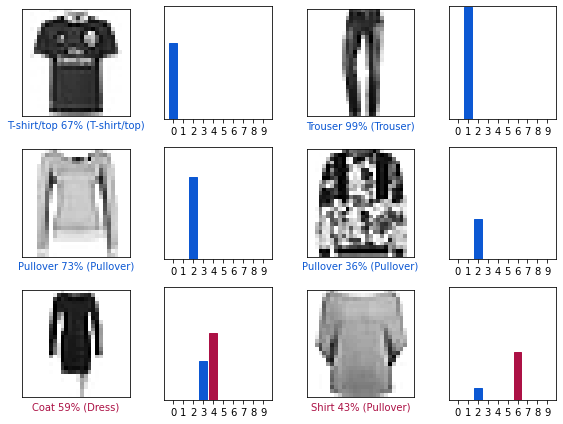

In [67]:
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_proba_lr[i], y_test, X_test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_proba_lr[i], y_test)
plt.tight_layout()
plt.show()

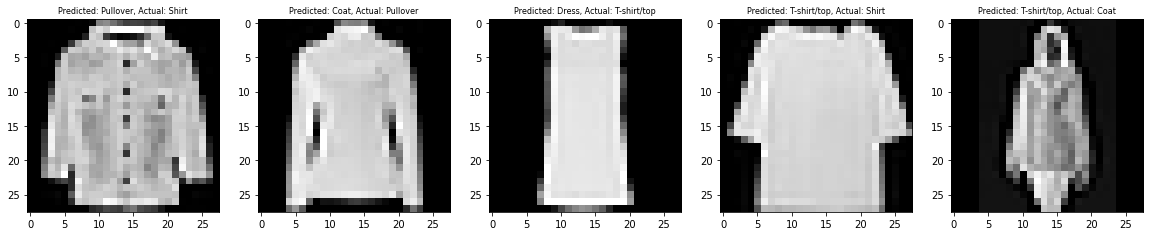

In [0]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred_lr):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[6:11]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test.values[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(label_dict[y_pred_lr[badIndex]], 
                                                 label_dict[y_test[badIndex]]), fontsize = 8)

# Model 5 - Simple NN

In [0]:
Y_train = keras.utils.to_categorical(y_train, 10)
Y_val = keras.utils.to_categorical(y_val, 10)

In [0]:
from keras.regularizers import l2
# building a linear stack of layers with the sequential model
model_NN = Sequential()
# hidden layer
model_NN.add(Dense(200, input_shape=(784,), activation='relu'))
model_NN.add(Dense(150, activation='relu',kernel_regularizer=l2(0.01)))
model_NN.add(Dense(110, activation='relu'))
model_NN.add(Dense(50, activation='relu'))
model_NN.add(Dropout(0.2)) # avoid overfitting
model_NN.add(Dense(10, activation='softmax'))

model_NN.summary()
model_NN.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 100 epochs
history_NN=model_NN.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_val, Y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 110)               16610     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 209,820
Trainable params: 209,820
Non-trainable params: 0
________________________________________________

In [0]:
# save models 
model_yaml = model_NN.to_yaml()
with open("/content/drive/My Drive/ML Final Project/model_NN.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    model_NN.save_weights("/content/drive/My Drive/ML Final Project/model_NN.h5")

print("Saved model to disk")

Saved model to disk


In [75]:
# # load model from disk
# from keras.models import model_from_yaml

# yaml_file = open("/content/drive/My Drive/ML Final Project/model_NN.yaml", 'r')
# loaded_model_yaml = yaml_file.read()
# yaml_file.close()
# model_NN = model_from_yaml(loaded_model_yaml)
# # load weights into new model
# model_NN.load_weights("/content/drive/My Drive/ML Final Project/model_NN.h5")
# print("Loaded model from disk")

Loaded model from disk


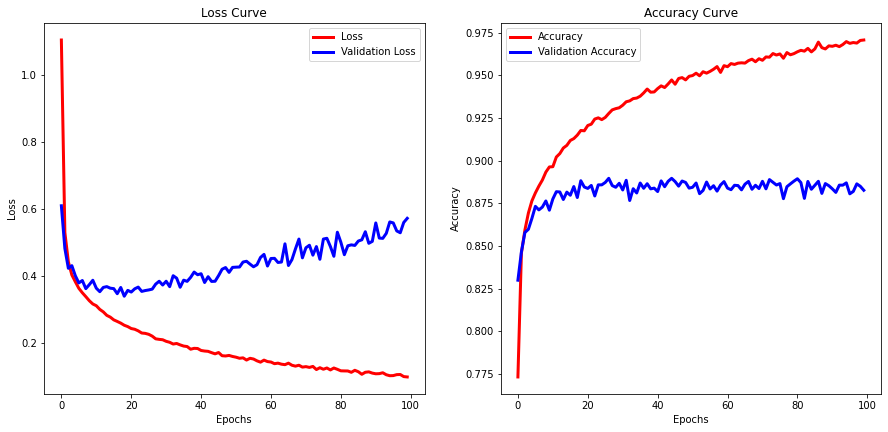

In [0]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(history_NN.history['loss'], 'r', linewidth=3.0, label='Loss')
plt.plot(history_NN.history['val_loss'], 'b', linewidth=3.0,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(2, 2, 2)
plt.plot(history_NN.history['accuracy'], 'r', linewidth=3.0, label='Accuracy')
plt.plot(history_NN.history['val_accuracy'], 'b', linewidth=3.0, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

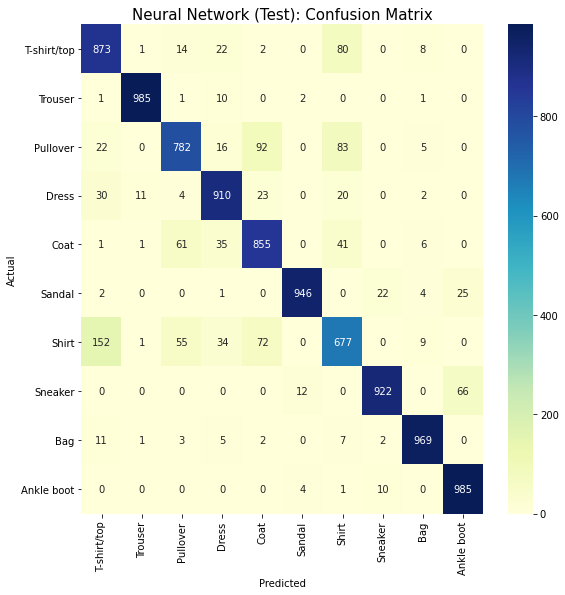

In [76]:
predict_NN_class=model_NN.predict_classes(X_test)

# plot confusion matrix
NN_cm = confusion_matrix(y_test, predict_NN_class)

plt.figure(figsize=(9,9))
sns.heatmap(NN_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('Neural Network (Test): Confusion Matrix', size = 15)
plt.show()

In [77]:
# classification report - test

cr_NN = classification_report(y_test, predict_NN_class, target_names = target_names)
print('NN (Test) \n', cr_NN)

NN (Test) 
               precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.78      0.81      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.82      0.85      0.84      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.96      0.92      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Model 6 - NN with 1 CNN Layer

In [0]:
# set image size
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1) 

In [15]:
# reshape images to (28, 28, 1)
X_train_cnn = X_train.values.reshape(X_train.shape[0],*image_shape)
X_val_cnn = X_val.values.reshape(X_val.shape[0],*image_shape)
X_test_cnn = X_test.values.reshape(X_test.shape[0],*image_shape)

print(X_train_cnn.shape, X_val_cnn.shape, X_test_cnn.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
# create CNN model
cnn1_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

cnn1_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [0]:
# compile model
cnn1_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

# add early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint(basepath + 'cnn1_model.h5', monitor='val_loss', mode='min', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]

In [0]:
# fit model
history = cnn1_model.fit(
    X_train_cnn,
    y_train,
    batch_size=4000,
    epochs=100,
    verbose=1,
    validation_data=(X_val_cnn, y_val)
    #callbacks= callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 115us/step - loss: 1.7660 - accuracy: 0.4821 - val_loss: 1.1343 - val_accuracy: 0.6295
Epoch 2/100
48000/48000 [==============================] - 1s 18us/step - loss: 0.8648 - accuracy: 0.7223 - val_loss: 0.6886 - val_accuracy: 0.7607
Epoch 3/100
48000/48000 [==============================] - 1s 18us/step - loss: 0.6217 - accuracy: 0.7862 - val_loss: 0.5751 - val_accuracy: 0.7983
Epoch 4/100
48000/48000 [==============================] - 1s 18us/step - loss: 0.5340 - accuracy: 0.8141 - val_loss: 0.5064 - val_accuracy: 0.8222
Epoch 5/100
48000/48000 [==============================] - 1s 18us/step - loss: 0.4848 - accuracy: 0.8329 - val_loss: 0.4702 - val_accuracy: 0.8347
Epoch 6/100
48000/48000 [==============================] - 1s 18us/step - loss: 0.4507 - accuracy: 0.8445 - val_loss: 0.4435 - val_accuracy: 0.8437
Epoch 7/100
48000/48000 [==============================] - 1s

In [0]:
# save models 
model_yaml = cnn1_model.to_yaml()
with open("/content/drive/My Drive/ML Final Project/cnn1_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    cnn1_model.save_weights("/content/drive/My Drive/ML Final Project/cnn1_model.h5")

print("Saved model to disk")

Saved model to disk


In [79]:
# # load model from disk
# from keras.models import model_from_yaml

# yaml_file = open("/content/drive/My Drive/ML Final Project/cnn1_model.yaml", 'r')
# loaded_model_yaml = yaml_file.read()
# yaml_file.close()
# cnn1_model = model_from_yaml(loaded_model_yaml)
# # load weights into new model
# cnn1_model.load_weights("/content/drive/My Drive/ML Final Project/cnn1_model.h5")
# print("Loaded model from disk")

Loaded model from disk


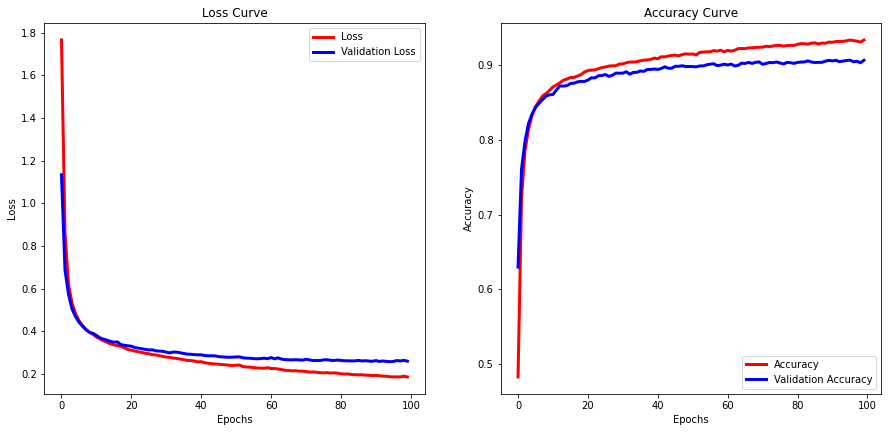

In [0]:
# plot model history
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], 'r', linewidth=3.0, label='Loss')
plt.plot(history.history['val_loss'], 'b', linewidth=3.0,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], 'r', linewidth=3.0, label='Accuracy')
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

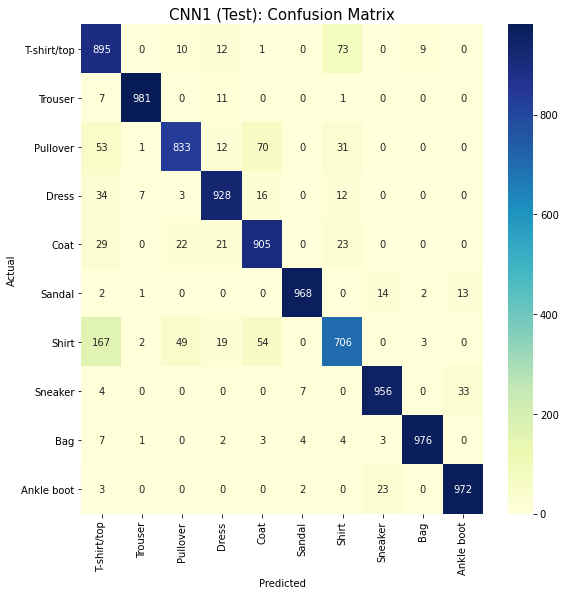

In [80]:
pred_y = cnn1_model.predict(X_test_cnn)
pred_y_cnn = np.argmax(np.round(pred_y),axis=1)

# plot confusion matrix
cnn1_cm = confusion_matrix(y_test, pred_y_cnn)

plt.figure(figsize=(9,9))
sns.heatmap(cnn1_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('CNN1 (Test): Confusion Matrix', size = 15)
plt.show()

In [0]:
# classification report

cr_cnn1 = classification_report(y_test, pred_y_cnn, target_names = target_names)
print('CNN 1 (Test) \n', cr_cnn1)

CNN 1 (Test) 
               precision    recall  f1-score   support

           0       0.75      0.90      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.91      0.83      0.87      1000
           3       0.92      0.93      0.93      1000
           4       0.86      0.91      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.83      0.71      0.76      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Model 7 - NN with 2 CNN Layers

In [0]:
import tensorflow
cnn2_model = Sequential()
cnn2_model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28,1)))
cnn2_model.add(BatchNormalization())
cnn2_model.add(Conv2D(32, (2, 2), activation='relu'))
cnn2_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn2_model.add(Dropout(0.25))
cnn2_model.add(Flatten())
cnn2_model.add(Dense(64, activation='relu'))
cnn2_model.add(Dropout(0.25))
cnn2_model.add(Dense(10, activation='softmax'))
cnn2_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn2_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [0]:
history_CNN = cnn2_model.fit(X_train_cnn, Y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_val_cnn, Y_val)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 112us/step - loss: 0.5136 - accuracy: 0.8205 - val_loss: 0.8735 - val_accuracy: 0.8718
Epoch 2/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.3432 - accuracy: 0.8777 - val_loss: 0.3206 - val_accuracy: 0.8828
Epoch 3/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.2973 - accuracy: 0.8910 - val_loss: 0.2631 - val_accuracy: 0.9013
Epoch 4/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.2672 - accuracy: 0.9024 - val_loss: 0.2661 - val_accuracy: 0.9023
Epoch 5/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.2453 - accuracy: 0.9100 - val_loss: 0.2430 - val_accuracy: 0.9087
Epoch 6/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.2283 - accuracy: 0.9159 - val_loss: 0.2473 - val_accuracy: 0.9099
Epoch 7/50
48000/48000 [==============================] - 4s 81us/s

In [0]:
# save models 
model_yaml = cnn2_model.to_yaml()
with open("/content/drive/My Drive/ML Final Project/cnn2_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    cnn2_model.save_weights("/content/drive/My Drive/ML Final Project/cnn2_model.h5")

print("Saved model to disk")

Saved model to disk


In [5]:
# load model from disk
from keras.models import model_from_yaml

yaml_file = open("/content/drive/My Drive/ML Final Project/cnn2_model.yaml", 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
cnn2_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
cnn2_model.load_weights("/content/drive/My Drive/ML Final Project/cnn2_model.h5")
print("Loaded model from disk")

Loaded model from disk


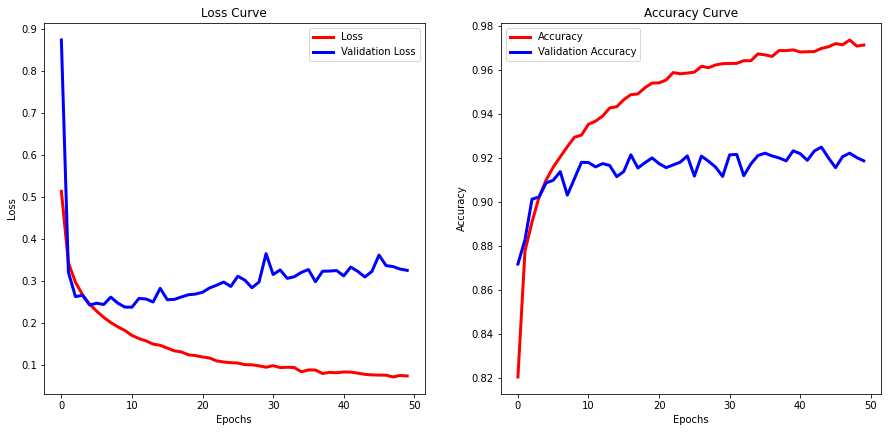

In [0]:
# plot model history
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(history_CNN.history['loss'], 'r', linewidth=3.0, label='Loss')
plt.plot(history_CNN.history['val_loss'], 'b', linewidth=3.0,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(2, 2, 2)
plt.plot(history_CNN.history['accuracy'], 'r', linewidth=3.0, label='Accuracy')
plt.plot(history_CNN.history['val_accuracy'], 'b', linewidth=3.0, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [0]:
# evaluate the model
Y_test = keras.utils.to_categorical(y_test, 10)
score_CNN=cnn2_model.evaluate(X_train_cnn, Y_train, verbose=0)
print('Train loss:', score_CNN[0])
print('Train accuracy:', score_CNN[1])
score_CNN_test= cnn2_model.evaluate(X_test_cnn, Y_test, verbose=0)
print('Test loss:', score_CNN_test[0])
print('Test accuracy:', score_CNN_test[1])

Train loss: 0.02006182956440413
Train accuracy: 0.995437502861023
Test loss: 0.31979290509968994
Test accuracy: 0.9262999892234802


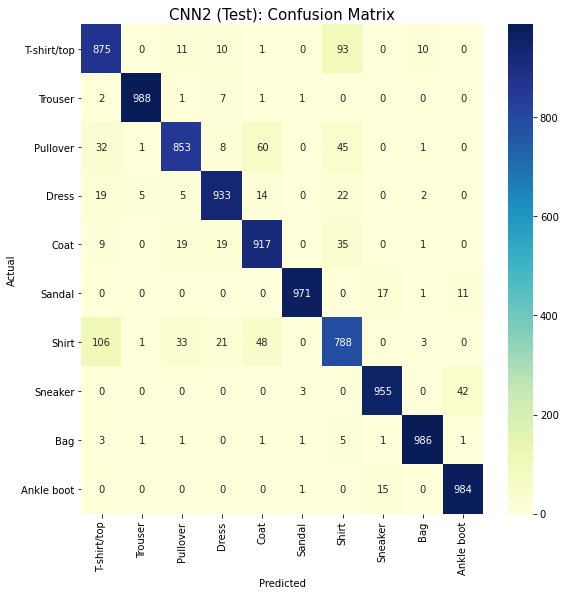

In [16]:
# confusion matrix 
pred_y_cnn2 = cnn2_model.predict(X_test_cnn)
predict_CNN_class = np.argmax(np.round(pred_y_cnn2),axis=1)

# plot confusion matrix
cnn2_cm = confusion_matrix(y_test, predict_CNN_class)

plt.figure(figsize=(9,9))
sns.heatmap(cnn2_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('CNN2 (Test): Confusion Matrix', size = 15)
plt.show()

In [17]:
# classification report

cr_cnn2 = classification_report(y_test, predict_CNN_class, target_names = target_names)
print('CNN 2 (Test) \n', cr_cnn2)

CNN 2 (Test) 
               precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.85      0.89      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.88      0.92      0.90      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.80      0.79      0.79      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.95      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [0]:
# Visualize images for each layers in cnn2
from keras.models import Model
layer_cvv2_outputs = [layer.output for layer in cnn2_model.layers[0:4]]
activation_model_cnn2 = Model(inputs=cnn2_model.input,outputs=layer_cvv2_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


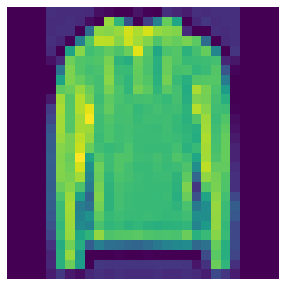

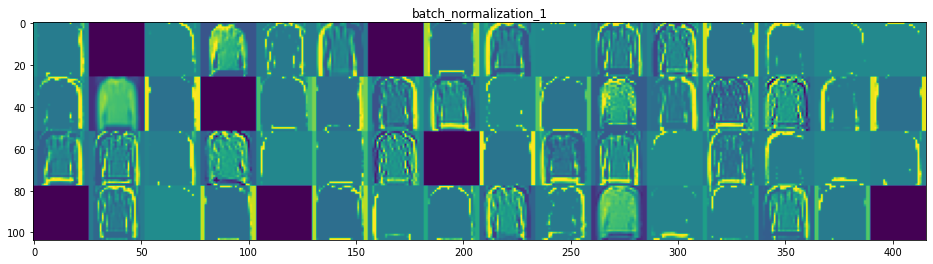

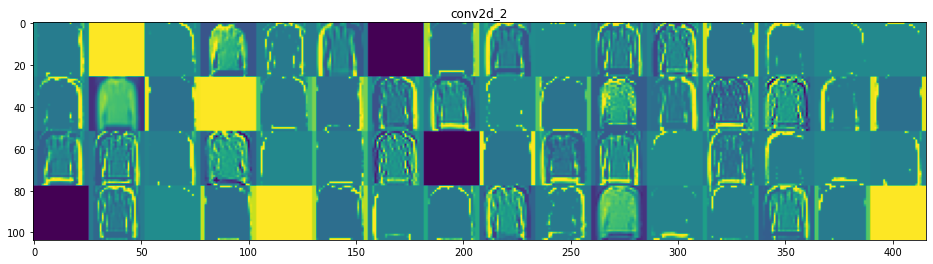

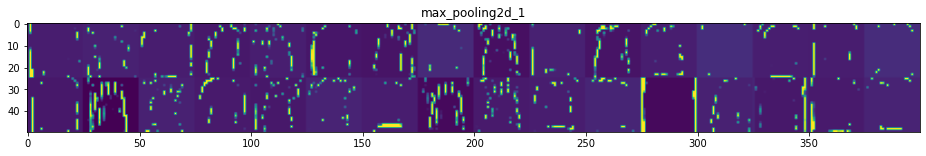

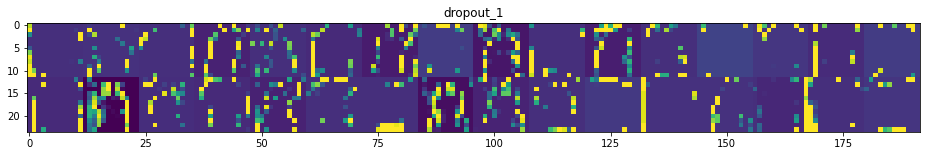

In [0]:
# choose a piciture to visualize 
img = X_train_cnn[1].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0])
plt.axis('off')

activations = activation_model_cnn2.predict(img)


layer_names = []
for layer in cnn2_model.layers[1:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

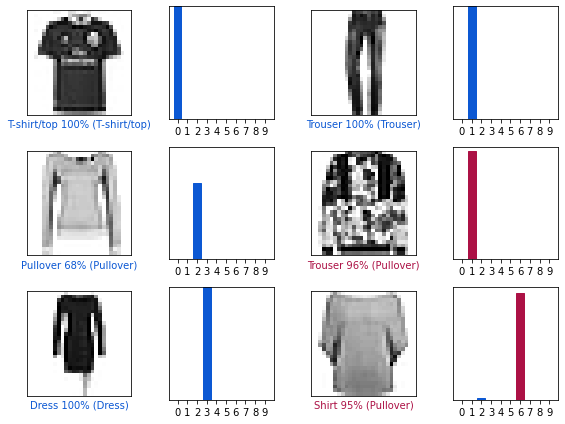

In [66]:
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_y_cnn2[i], y_test, X_test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_y_cnn2[i], y_test)
plt.tight_layout()
plt.show()


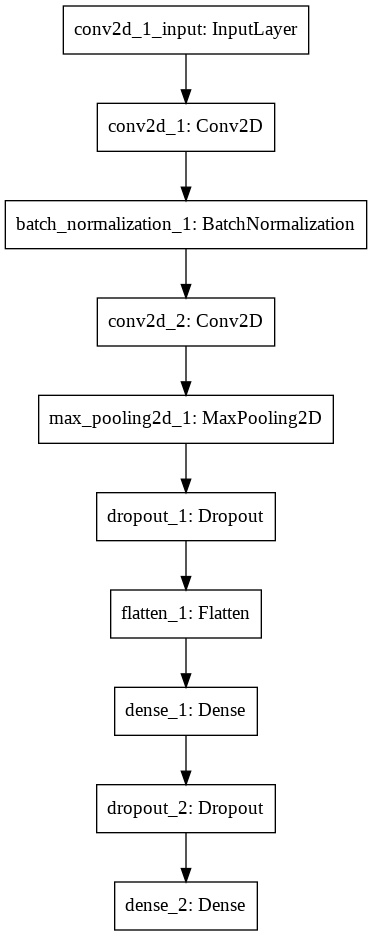

In [0]:
from keras.utils import plot_model

plot_model(cnn2_model)

# Evaluation

In [93]:
# models predicted values on test 
y_preds = {'SVM':sv_pred, 'XGB':best_preds, 'GBC': gbc_pred, 'Logistic_Regression': y_pred_lr, 'Nueral_Network': predict_NN_class, 'CNN_1': pred_y_cnn, 'CNN_2': predict_CNN_class}
models = ['SVM', 'XGB', 'GBC', 'Logistic_Regression', 'Nueral_Network', 'CNN_1', 'CNN_2']
models_precision = []
models_recall = []
models_f1_score = []
models_accuracy = []

# run through the models classification reports and pull out evaluation metrics 
for model in models:
    clf_report = classification_report(y_test, y_preds[model], output_dict=True)
    models_precision.append(clf_report['macro avg']['precision'])
    models_recall.append(clf_report['macro avg']['recall'])
    models_f1_score.append(clf_report['macro avg']['f1-score'])
    models_accuracy.append(clf_report['accuracy'])
    
# initialise data of lists
models_evaluation = {'model_precision': models_precision,
        'model_recall': models_recall,
        'models_f1_score': models_f1_score,
        'models_accuracy_score': models_accuracy} 

# Creates dataframe for evaluation metrics 
models_eval_metrics = pd.DataFrame(models_evaluation, index = models)
models_eval_metrics

,model_precision,model_recall,models_f1_score,models_accuracy_score
SVM,0.871190,0.8724,0.871287,0.8724
XGB,0.847906,0.8486,0.846678,0.8486
GBC,0.895048,0.8950,0.894924,0.8950
Logistic_Regression,0.850441,0.8525,0.851077,0.8525
Nueral_Network,0.890388,0.8904,0.889656,0.8904
CNN_1,0.914548,0.9120,0.911850,0.9120
CNN_2,0.925563,0.9250,0.925004,0.9250
